# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic

### RoadMap
- Import Relevant Libraries
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

## 1. Import Relevant Libraries :-

In [1]:
import pandas as pd

## 2. Collecting the data

### load train, test dataset using Pandas

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

**Total rows and columns**

We can see that there are 418 rows and 11 columns in our training dataset.

**Now Let's check how much null we got in our sets**

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with missing **Age**, 687 rows with missing **Cabin** and 2 rows with missing **Embarked** information.

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing **Age**, 327 rows with missing **Cabin** .

In [9]:
## we will compare survival rate using pivot table function
pd.pivot_table(train,index="Survived",values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


As we can see 

1- Younger Age tend to survive more

2- Higher Fare tend to survive more

3- Less SibSp and Higher Parch means more chance to survive

In [10]:
print(pd.pivot_table(train,index="Survived", columns = "Pclass", values ="Ticket", aggfunc = "count"))
print(pd.pivot_table(train,index="Survived", columns = "Sex", values ="Ticket", aggfunc = "count"))
print(pd.pivot_table(train,index="Survived", columns = "Embarked", values ="Ticket", aggfunc = "count"))
# here's another way to print those values
# print(pd.pivot_table(train,index="Survived", columns = ["Pclass", "Sex", "Embarked"], values ="Ticket", aggfunc = "count"))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


As we can see for "Pclass" "1st" class tend to have more surviving chance than 2nd and 3rd

Females tend to have more surviving chances than Males

surviving_chance_for_southamptons = 24    % chance of surviving

surviving_chance_for_Queenstown   = 3.4   % chance of surviving

surviving_chance_for_Cherbourg    = 9.32  % chance of surviving

In [11]:
### Now Let's figure this values

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## Now We Will Plot those 2 Categories

### Bar Chart for Categorical Features
- Pclass
- Sex
- Survived
- Embarked


### Bar Chart for Numerical Features
- Age
- SibSp
- Parch
- Fare

In [13]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

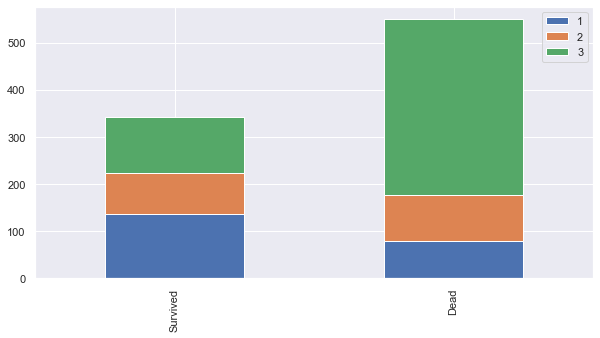

In [14]:
bar_chart('Pclass')

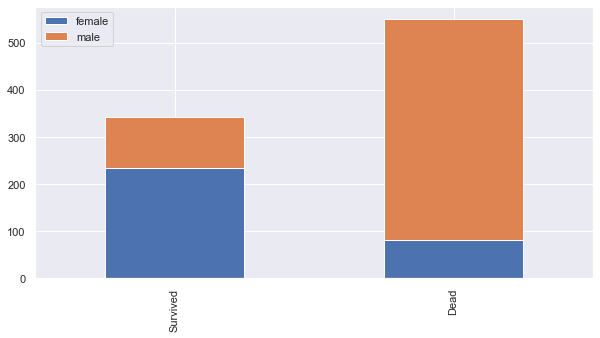

In [15]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

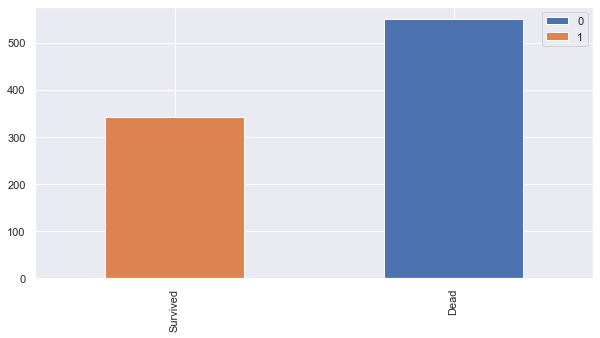

In [16]:
bar_chart('Survived')

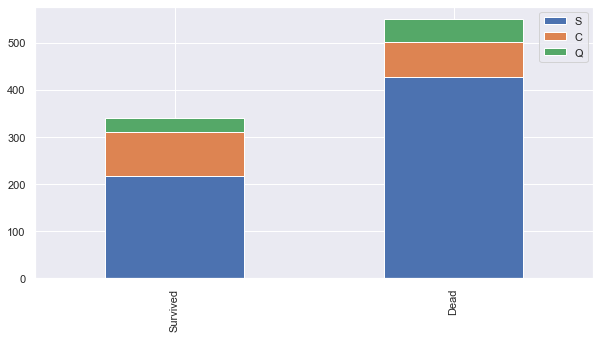

In [17]:
bar_chart('Embarked')

The Chart confirms **C** more likely survivied than **Q , S**

### Now Numerical bar charts

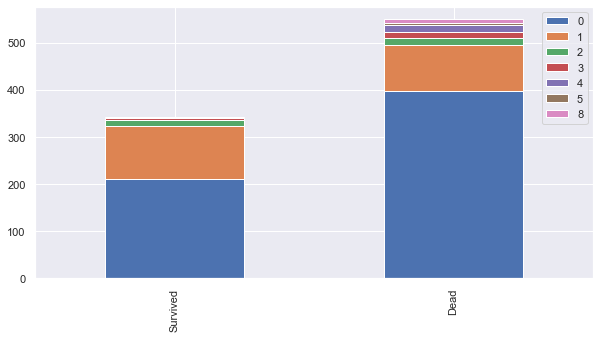

In [18]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

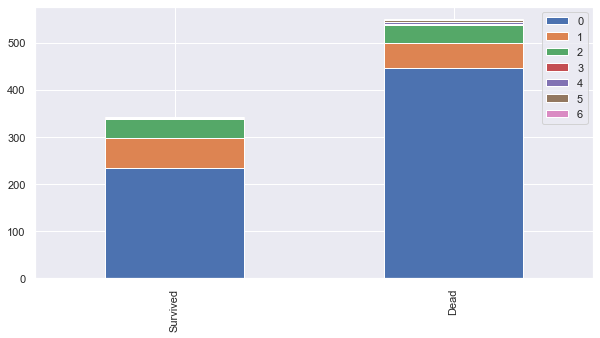

In [19]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

In [20]:
## Now Let's Fill missing values in train data

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 Name

In [22]:
comb_data = [train, test] #pd.concat([train, test])  # combining train and test dataset

for dataset in comb_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Sir           1
Lady          1
Ms            1
Countess      1
Mme           1
Capt          1
Don           1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [25]:
### Now let's map new values express those titles and check if this will help us in our analysis
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in comb_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

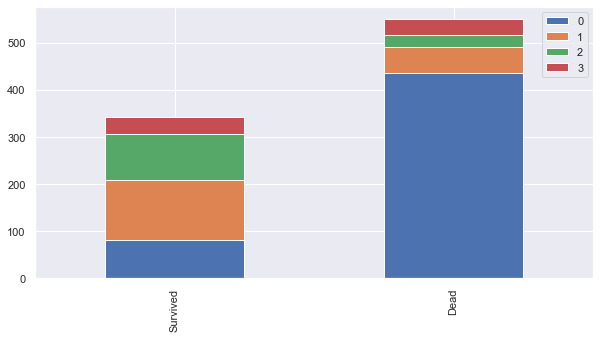

In [26]:
bar_chart('Title')

In [27]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### 4.2 Sex

male: 0
female: 1

In [28]:
sex_mapping = {"male": 0, "female": 1}

In [29]:
for dataset in comb_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

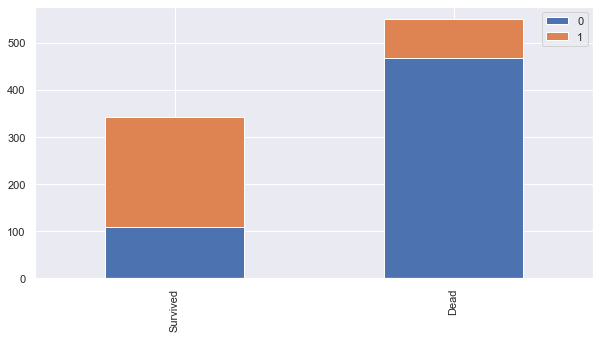

In [30]:
bar_chart('Sex')

### 4.3 Age

In [31]:
# impute nulls for continuous data
train.dropna(subset=['Embarked'],inplace = True)
test.dropna(subset=['Embarked'],inplace = True)

train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"), inplace=True)

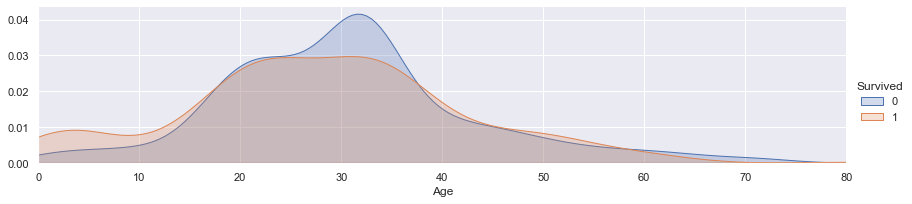

In [32]:
Facet_Grid= sns.FacetGrid(train, hue="Survived",aspect=4)
Facet_Grid.map(sns.kdeplot,'Age',shade= True)
Facet_Grid.set(xlim=(0, train['Age'].max()))
Facet_Grid.add_legend()
plt.show()

#### Converting
Now we start Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [33]:
for dataset in comb_data:
    dataset.loc[ dataset['Age'] <= 16 , 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

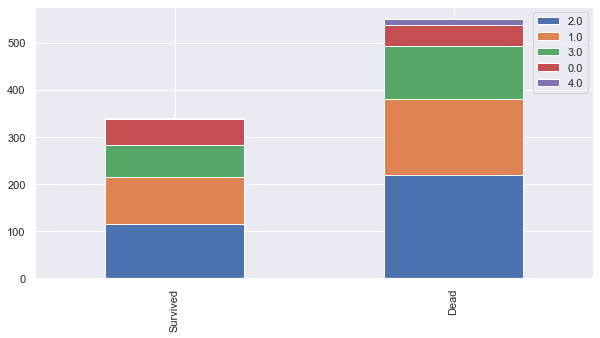

In [34]:
bar_chart('Age')

### 4.4 Embarked

<AxesSubplot:>

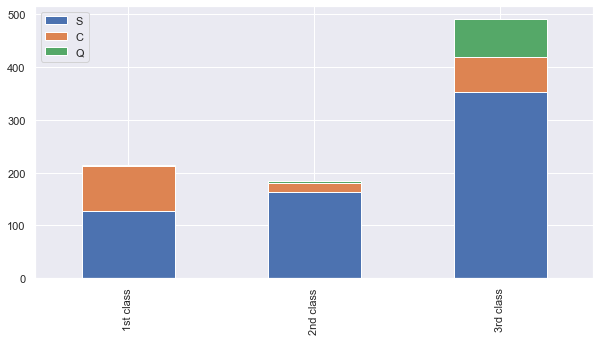

In [35]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

In [36]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in comb_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.5 Fare

In [37]:
# fill missing Fare with mean fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

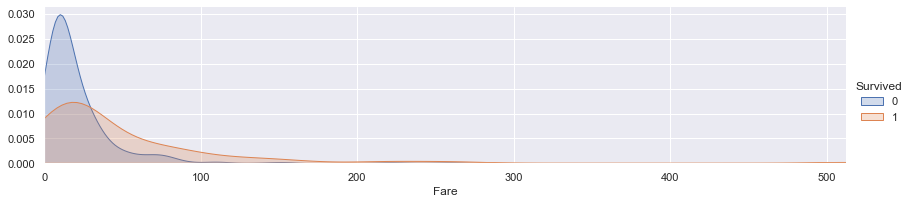

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

In [39]:
for dataset in comb_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

### 4.6 Cabin

In [40]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
E101           3
              ..
D10 D12        1
F38            1
C110           1
C103           1
D37            1
Name: Cabin, Length: 146, dtype: int64

In [41]:
for dataset in comb_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

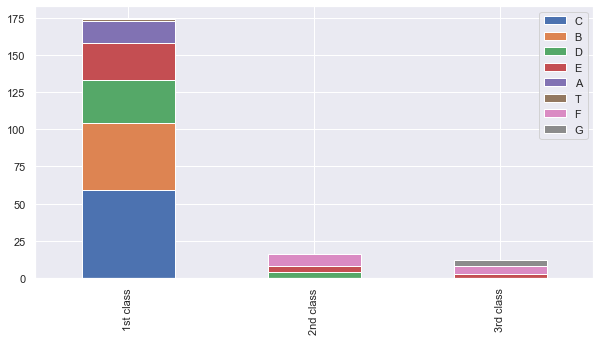

In [42]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [43]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in comb_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [44]:
# fill missing Cabin with mean fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)

### 4.7 Parch

In [45]:
train["Parch_n"] = train["SibSp"] + train["Parch"] + 1
test["Parch_n"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

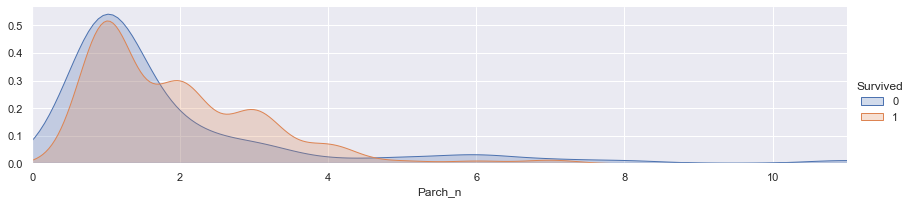

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Parch_n',shade= True)
facet.set(xlim=(0, train['Parch_n'].max()))
facet.add_legend()
plt.xlim(0)

In [47]:
f_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in comb_data:
    dataset['Parch_n'] = dataset['Parch_n'].map(f_mapping)

In [48]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [49]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((889, 8), (889,))

In [50]:
train_data.describe().columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Parch_n'],
      dtype='object')

## 5. Modeling

In [55]:
## Now let's import relevant libraries

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

### 5.1 LogisticRegression

In [57]:
reg = LogisticRegression(max_iter = 2000)
scoring = 'accuracy'
score = cross_val_score(reg, train_data, target, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.8258427  0.81460674 0.80898876 0.81460674 0.83050847]


81.89

### 5.2 Cross Validation (K-fold)

In [58]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 5.2.3 kNN Classifier

In [59]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.73033708 0.74157303 0.84269663 0.76404494 0.88764045 0.83146067
 0.86516854 0.79775281 0.83146067 0.92045455]


82.13

### 5.2.4 Decision Tree Classifier

In [60]:
DTC = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(DTC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.76404494 0.75280899 0.78651685 0.75280899 0.85393258 0.79775281
 0.83146067 0.71910112 0.78651685 0.875     ]


79.2

### 5.2.5 Random Forest Classifier

In [61]:
RFC = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(RFC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.78651685 0.75280899 0.82022472 0.76404494 0.85393258 0.82022472
 0.85393258 0.74157303 0.82022472 0.90909091]


81.23

### 5.2.6 Naive Bayes Classifier

In [62]:
GNB = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(GNB, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.65168539 0.76404494 0.80898876 0.7752809  0.80898876 0.82022472
 0.80898876 0.74157303 0.74157303 0.86363636]


77.85

### 5.2.7 SVM Classifier

In [63]:
SVC = SVC()
scoring = 'accuracy'
score = cross_val_score(SVC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.75280899 0.76404494 0.88764045 0.78651685 0.8988764  0.83146067
 0.8988764  0.79775281 0.80898876 0.90909091]


83.36

### Results

Logistic Regression = 81.89

kNN Classifier = 82.13

Decision Tree Classifier = 79.2

Random Forset Classifier = 81.23

Naive Bayes Classifier = 77.85

SVM Classifier = 83.36

### Models from Higher to Worst

- SVM Classifier
- kNN Classifier
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier
- Naive Bayes Classifier

So the best result was using SVM Classifier so we will test accuracy with it

## 7. Testing

In [66]:
SVC.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction = SVC.predict(test_data)

In [67]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [68]:
submission = pd.read_csv('submission.csv')

In [74]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## References

This notebook is created by learning from the following notebooks:

- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
- [Kenjee : Titanic Project Example](https://www.kaggle.com/kenjee/titanic-project-example)
- [Minsuk Heo 허민석](https://www.youtube.com/user/TheEasyoung)